# Anti Money Laundering


#### 1. Business Problem

The purpose of this Anti-money laundering (AML) is to process of preventing and detecting the use of illicit funds for illegal activities. AML is a crucial challenge for financial institutions, as they face the risk of regulatory fines, reputational damage, and criminal prosecution if they fail to comply with the laws and regulations that aim to combat money laundering. AML also helps to protect the integrity and stability of the financial system, and to prevent the financing of terrorism, corruption, and other crimes.

#### 1.1. Business Objective

Maximize 

1. Compliance with legal and regulatory requirement
                   
Mininize
                    
1. The cost of compliance
                   
2. The risk of financial Crime
                   
3. The impact on Customer Experiance
                   
4. The financial losses
                   
5. Reputational risk

#### 1.2. Business Constraints

Maximize
    
1. The effectiveness of AML measures
        
2. The Allocation of resourse
            
Minimizes

1. the impact on customer experience
                    
2. the risk of financial exclusion

3. the impact on profitability

#### 2. Success Criteria

1. Business success criteria: A successful AML program ensures that the business is fully compliant with all relevant regulations, laws, and guidelines related to AML.
2. ML success criteria: Achiceve An Accuracy Of Atleast 90%
3. Economic success criteria: An effective AML program can help businesses identify and manage financial crime risks more effectively, reducing the likelihood of financial losses and other negative impacts.
4. Build a machine learning model to classify fraud and non-fraud transactions
5. Reduce the false negatives by tuning the model


#### 3. Data Collection

Synthetic dataset is generated with 100000 rows and 11 columns

Metadata Description

1. Step: Maps of unit time in real world.  (Ex: 1,2,3,........94)
2. Type: CASH-IN, CASH-OUT, DEBIT, PAY-MENT and TRANSFER.( Payment Method)
3. Amount: Amount of transaction in local currency. (Ex: 1047597,748463,....)
4. nameOrig: Customer number which starts transaction.( Ex: M000024121,...)
5. oldbalanceOrg: Initial balance before the transaction.(Ex: 9340000, 6130000,....)
6. newbalanceOrig: Customer's balance after the transaction.(Ex: 9340000, 6130000,....)
7. nameDest: Recipient of transaction's number.(Ex: M000027322)
8. oldbalanceDest: Initial recipient balance before the transaction.(Ex: 0)
9. newbalanceDest: Recipient's balance after the transaction.(Ex: 0)
10. isFraud: Fraud or not.(Ex: 1 or 0)
11. isFlaggedFraud: Money laundering or not according our heuristics.(Ex: 1 or 0)

#### 4. Data Preprocessing 
Cleaning Data and EDA/ Description Analytics

#### 5. Model Building
Hyperparameters tuning and Imbalanced dataset

#### Importing The Required Libraries

In [68]:
pip install feature-engine


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import feature_engine

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

Read the dataset

In [70]:
AML_Data= pd.read_csv(r"Money_Laundering_Dataset.csv")
AML_Data

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,2.0,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,3.0,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,4.0,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,99996.0,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,99997.0,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,99998.0,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [71]:
data_backup = AML_Data.copy()

In [72]:
#Dataset Information
AML_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      99997 non-null   float64
 1   step            99323 non-null   float64
 2   type            100000 non-null  object 
 3   amount          100000 non-null  float64
 4   nameOrig        99990 non-null   object 
 5   oldbalanceOrg   99857 non-null   float64
 6   newbalanceOrig  99978 non-null   float64
 7   nameDest        99996 non-null   object 
 8   oldbalanceDest  99948 non-null   float64
 9   newbalanceDest  100000 non-null  float64
 10  isFraud         99683 non-null   float64
 11  isFlaggedFraud  99929 non-null   float64
dtypes: float64(9), object(3)
memory usage: 9.2+ MB


In [73]:
# Check The Null Values
AML_Data.isna().sum()

Unnamed: 0          3
step              677
type                0
amount              0
nameOrig           10
oldbalanceOrg     143
newbalanceOrig     22
nameDest            4
oldbalanceDest     52
newbalanceDest      0
isFraud           317
isFlaggedFraud     71
dtype: int64

In [74]:
#Distribution of lefit transactions & Fraudulent transactions 
AML_Data['isFraud'].value_counts()

isFraud
0.0    99268
1.0      415
Name: count, dtype: int64

In [75]:
#Data Described
AML_Data.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,99997.000000,99323.000000,1.000000e+05,9.985700e+04,9.997800e+04,9.994800e+04,1.000000e+05,99683.000000,99929.000000
mean,50000.972579,8.496229,1.736022e+05,8.789148e+05,8.942587e+05,8.805609e+05,1.184041e+06,0.004163,0.000010
std,28866.838833,1.831287,3.443003e+05,2.674992e+06,2.711584e+06,2.402526e+06,2.802350e+06,0.064389,0.003163
min,0.000000,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,25002.000000,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,50001.000000,9.000000,5.274552e+04,2.010000e+04,0.000000e+00,2.082250e+04,4.990918e+04,0.000000,0.000000
75%,75000.000000,10.000000,2.117631e+05,1.908585e+05,2.149436e+05,5.881914e+05,1.058186e+06,0.000000,0.000000
max,99999.000000,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,1.000000


In [76]:
#To chech the shape of the dataset
print("Shape of the Dataset:", AML_Data.shape)

Shape of the Dataset: (100000, 12)


###  Exploratory Data Analysis

### ***1.1 Measures of Central Tendency*** 

1. Mean
2. median
3. Mode

In [77]:
#Mean
print("  mean  ".center(50,"#"))
print("\n")
print(AML_Data.mean())

#####################  mean  #####################




TypeError: can only concatenate str (not "int") to str

In [78]:
#Median
print("  median  ".center(50,"#"))
print("\n")
print(AML_Data.median())

####################  median  ####################




TypeError: could not convert string to float: 'PAYMENT'

In [79]:
#Mode
print("  mode  ".center(50,"#"))
print("\n")
print(AML_Data.mode())

#####################  mode  #####################


       Unnamed: 0  step     type    amount     nameOrig  oldbalanceOrg  \
0             0.0   9.0  PAYMENT   2475.13  C1000037689            0.0   
1             1.0   NaN      NaN   6285.19  C1000039823            NaN   
2             2.0   NaN      NaN  17320.91  C1000079132            NaN   
3             3.0   NaN      NaN  25975.86  C1000109302            NaN   
4             4.0   NaN      NaN  29707.86  C1000119377            NaN   
...           ...   ...      ...       ...          ...            ...   
99992     99995.0   NaN      NaN       NaN          NaN            NaN   
99993     99996.0   NaN      NaN       NaN          NaN            NaN   
99994     99997.0   NaN      NaN       NaN          NaN            NaN   
99995     99998.0   NaN      NaN       NaN          NaN            NaN   
99996     99999.0   NaN      NaN       NaN          NaN            NaN   

       newbalanceOrig    nameDest  oldbalanceDest  newbala

### 2nd Moment Business Decision (Measures of Dispersion)
1. Variance
2. Standard deviation
3. Range (maximum - minimum)

In [80]:
#Variance
print("  Variance  ".center(50,"#"))
print("\n")
print(AML_Data.var())

###################  Variance  ###################




TypeError: could not convert string to float: 'PAYMENT'

For Standard derivation and Range we can simple use Describe

In [81]:
AML_Data.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,99997.000000,99323.000000,1.000000e+05,9.985700e+04,9.997800e+04,9.994800e+04,1.000000e+05,99683.000000,99929.000000
mean,50000.972579,8.496229,1.736022e+05,8.789148e+05,8.942587e+05,8.805609e+05,1.184041e+06,0.004163,0.000010
std,28866.838833,1.831287,3.443003e+05,2.674992e+06,2.711584e+06,2.402526e+06,2.802350e+06,0.064389,0.003163
min,0.000000,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,25002.000000,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,50001.000000,9.000000,5.274552e+04,2.010000e+04,0.000000e+00,2.082250e+04,4.990918e+04,0.000000,0.000000
75%,75000.000000,10.000000,2.117631e+05,1.908585e+05,2.149436e+05,5.881914e+05,1.058186e+06,0.000000,0.000000
max,99999.000000,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,1.000000


### ***3rd Business Moment Decision (Skewness)***

Measure of asymmetry in the data distribution

In [82]:
#Skewnss
print("  Skewness  ".center(50,"#"))
print("\n")
AML_Data.skew()

###################  Skewness  ###################




TypeError: could not convert string to float: 'PAYMENT'

### ***4th Business Moment Decision (Kurtosis)***

Measure of peakedness - represents the overall spread in the data

In [83]:
#Kurtosis
print("  mean  ".center(50,"#"))
print("\n")
AML_Data.kurt()

#####################  mean  #####################




TypeError: could not convert string to float: 'PAYMENT'

### Data Visualization

In [84]:
AML_Data['type'].value_counts()

type
PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: count, dtype: int64

In [85]:
type = AML_Data['type'].value_counts()
transaction = type.index
quantity = type.values

In [86]:
import plotly.express as px
px.pie(AML_Data,values=quantity,names=transaction,hole=0.4,title="Distribution of Transaction type")

([<matplotlib.patches.Wedge at 0x24582fc8a90>,
 [Text(-1.099905916824577, 0.014386595646186707, ''),
  Text(1.0999059164457412, -0.01438662460948792, '')],
 [Text(-0.5999486819043146, 0.007847233988829111, '99.58%'),
  Text(0.5999486816976769, -0.00784724978699341, '0.42%')])

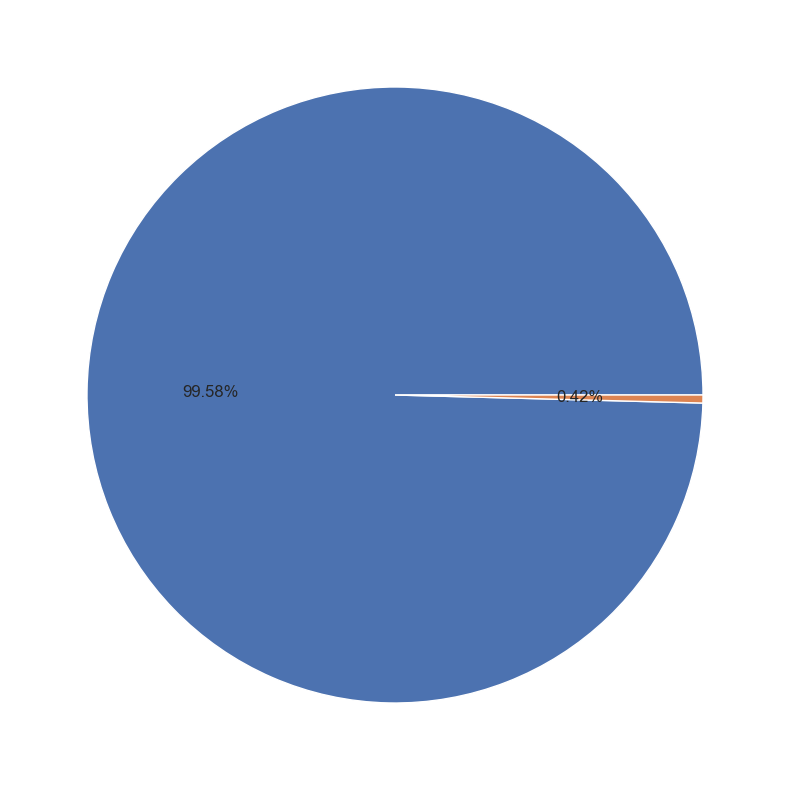

In [87]:
plt.pie(AML_Data['isFraud'].value_counts(),  autopct='%.2f%%')

In [88]:
plt.figure(figsize=(10,5))
sns.heatmap(AML_Data.corr(),annot=True)

ValueError: could not convert string to float: 'PAYMENT'

<Figure size 1000x500 with 0 Axes>

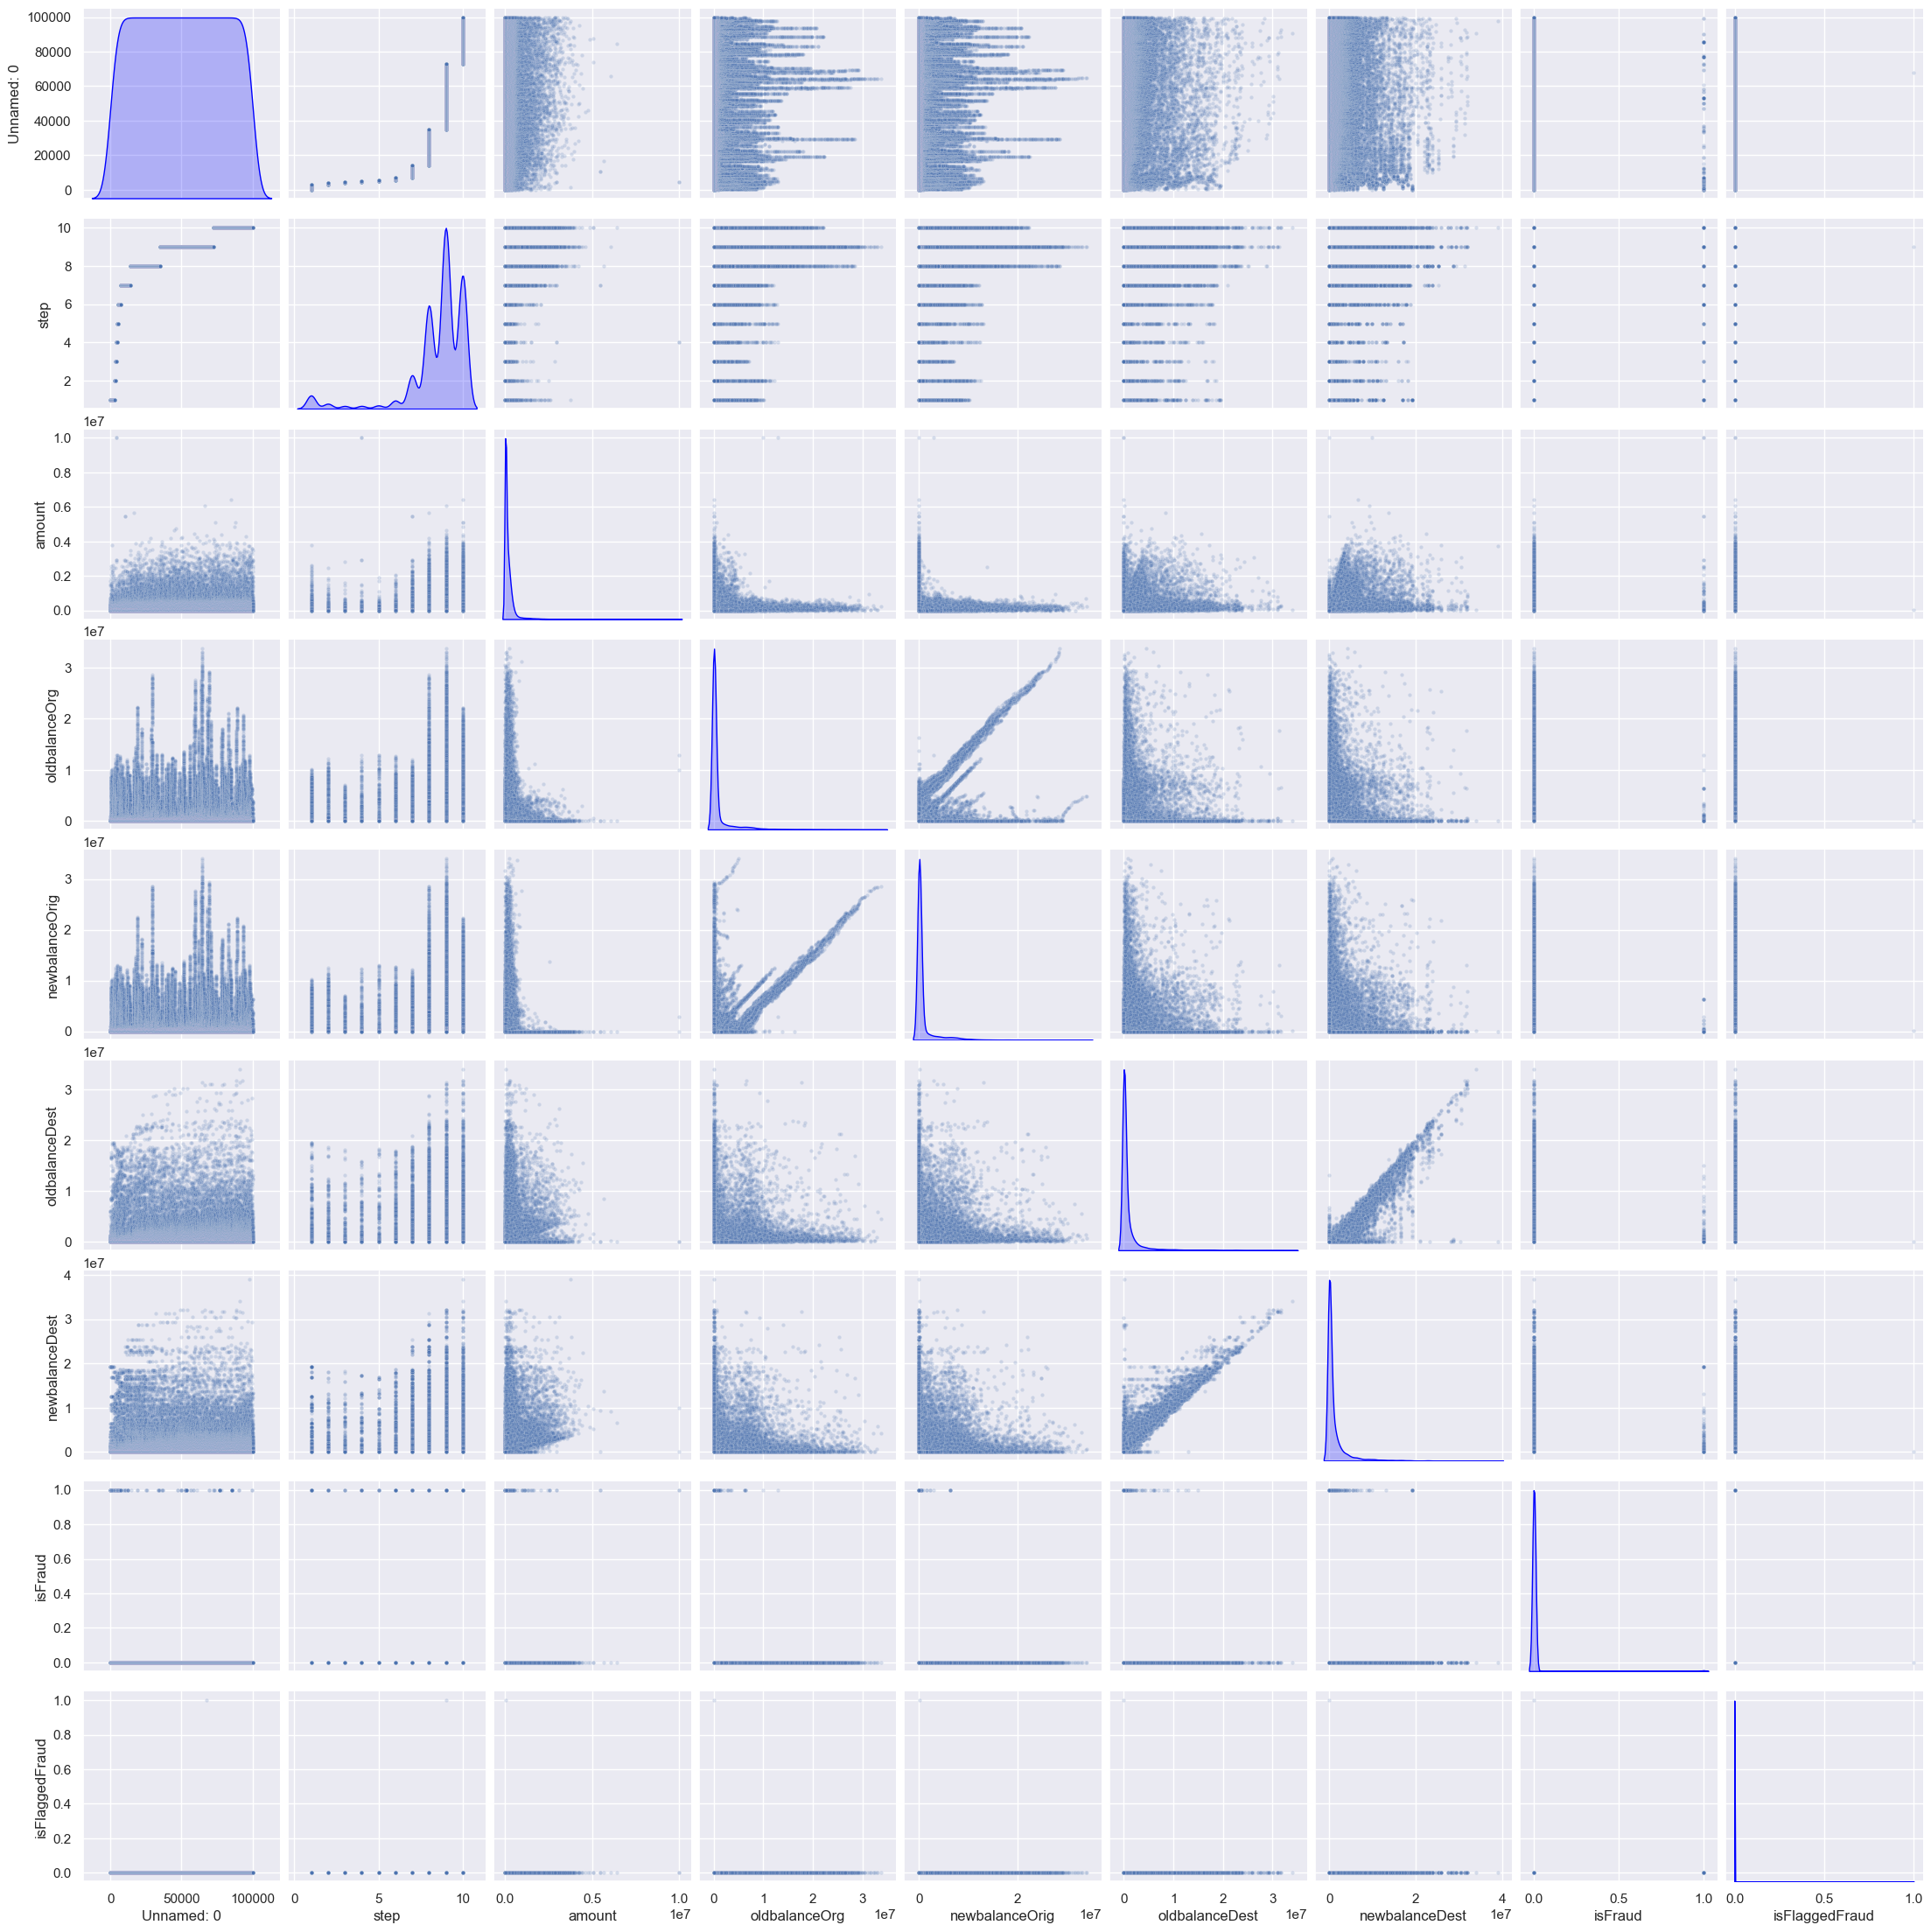

In [89]:
sns.pairplot(AML_Data, diag_kind='kde', 
             plot_kws={'alpha': 0.2, 's': 10}, 
             diag_kws={'bw_adjust': 1.5, 'color': 'blue'},
             palette='coolwarm')

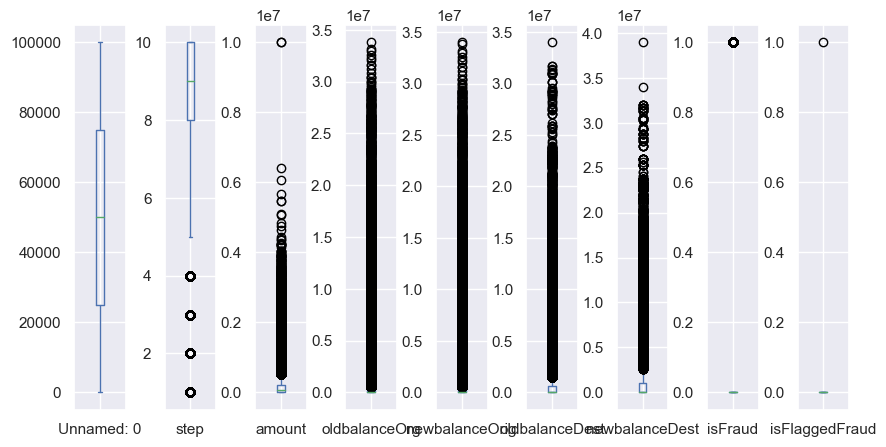

In [90]:
#to find wheather it has outlier using box plot
AML_Data.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 5))
# Increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

## Exploring Some AutoEDA

In [91]:
import sweetviz

my_report = sweetviz.analyze([AML_Data,'AML_Data'])
my_report.show_notebook()

ModuleNotFoundError: No module named 'sweetviz'

## Preprocessing of Data

### Remove Unwanted Features

In [ ]:
AML_Data.drop(['Unnamed: 0','step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
AML_Data = AML_Data.reset_index(drop=True)

### Seperating the Predictors and Target variables

In [ ]:
AML_Data = AML_Data.dropna(subset=["isFraud"])

In [ ]:
X = pd.DataFrame(AML_Data.iloc[:, 0:6])
Y = pd.DataFrame(AML_Data.iloc[:, 6])

In [ ]:
X

In [ ]:
Y

### Splitting the data into numerical and categorical

In [ ]:
df_cate = X.select_dtypes(include=['object']).columns
df_num = X.select_dtypes(exclude=['object']).columns

In [ ]:
for feature in AML_Data.columns:
    print("{} - has - {} - number of unique categories".format(feature, AML_Data[feature].nunique()))

In [ ]:
print(df_cate)
print('\n')
print(df_num)

## Missing value Analysis
### Imputation

In [ ]:
#checking for missing values

AML_Data.isnull().sum()

In [ ]:
# Define pipeline for missing data if any

num_pipeline = Pipeline(steps=[('impute',SimpleImputer(strategy='median'))])
preprocessor = ColumnTransformer(transformers=[('median',num_pipeline,df_num)])

# Fit the imputation pipeline to input features
imputation = preprocessor.fit(X)

#save the pipeline
joblib.dump(imputation,'medianimpute')

In [ ]:
# Transformed data
cleandata = pd.DataFrame(imputation.transform(X), columns = df_num)
cleandata.isnull().sum()

In [ ]:
AML_Data.fillna(AML_Data.median(),inplace=True)

## Outlier Analysis

In [ ]:
#to find wheather it has outlier using box plot
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (12, 10))
# Increase spacing between subplots
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [ ]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr',
                          tail = 'both', fold = 1.5, variables = list(cleandata.columns))

clean = winsor.fit(cleandata)

# Save winsorizer model
joblib.dump(clean, 'winsor')

In [ ]:
cleandata1 = clean.transform(cleandata)
cleandata1

In [ ]:
# Boxplot
cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

## Scaling with MinMaxScaler

In [94]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, df_num)])
scale = scale_columntransfer.fit(cleandata1)

In [95]:
# Save Minmax scaler pipeline model
joblib.dump(scale, 'minmax')

['minmax']

In [96]:
scaled_data = pd.DataFrame(scale.transform(cleandata1))
scaled_data
scaled_data.describe()

,0,1,2,3,4
count,99683.000000,99683.000000,99683.000000,99683.000000,99683.000000
mean,0.254795,0.263568,0.251573,0.252919,0.245379
std,0.305937,0.386628,0.388805,0.369740,0.358906
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019354,0.000000,0.000000,0.000000,0.000000
50%,0.101934,0.042077,0.000000,0.014073,0.018624
75%,0.411612,0.400000,0.400000,0.400000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Zero variance and near zero variance ####

In [97]:
scaled_data.var() == 0

0    False
1    False
2    False
3    False
4    False
dtype: bool

## Encoding Categorical features

In [98]:
encoding_pipeline = Pipeline(steps = [('lable', OneHotEncoder(drop = 'if_binary'))])
preprocess_pipeline1 = ColumnTransformer(transformers = [('categorical', encoding_pipeline, df_cate)])
clean1 = preprocess_pipeline1.fit(X)
joblib.dump(clean1, 'encode')

ValueError: A given column is not a column of the dataframe

In [99]:
encode_data = pd.DataFrame(clean1.transform(X).todense())
encode_data

KeyError: "None of [Index(['type'], dtype='object')] are in the [columns]"

In [ ]:
clean_data = pd.concat([scaled_data, encode_data], axis=1 , ignore_index = True)
clean_data

### SMOTE

In [ ]:
X

In [100]:
X['type'].nunique()

KeyError: 'type'

In [101]:
clean_data

,0,1,2,3,4,5,6,7,8,9
0,0.019150,0.354870,0.296393,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.003628,0.044321,0.035843,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.000352,0.000378,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.000352,0.000378,0.000000,0.014460,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.022708,0.086673,0.055260,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99678,0.009503,0.042077,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99679,0.004136,0.042077,0.008206,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99680,0.143358,0.042077,0.000000,0.578205,0.309379,0.0,1.0,0.0,0.0,0.0
99681,0.158154,0.042077,0.365809,0.228586,0.117405,1.0,0.0,0.0,0.0,0.0


In [102]:
X = clean_data

In [103]:
X

,0,1,2,3,4,5,6,7,8,9
0,0.019150,0.354870,0.296393,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.003628,0.044321,0.035843,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.000352,0.000378,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.000352,0.000378,0.000000,0.014460,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.022708,0.086673,0.055260,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99678,0.009503,0.042077,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99679,0.004136,0.042077,0.008206,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
99680,0.143358,0.042077,0.000000,0.578205,0.309379,0.0,1.0,0.0,0.0,0.0
99681,0.158154,0.042077,0.365809,0.228586,0.117405,1.0,0.0,0.0,0.0,0.0


In [104]:
from imblearn.over_sampling import SMOTE

In [105]:
Y

,isFraud
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
99982,0.0
99983,0.0
99984,0.0
99985,0.0


In [106]:
over_sample = SMOTE()
feat,label = over_sample.fit_resample(X,Y)

<Axes: xlabel='isFraud', ylabel='count'>

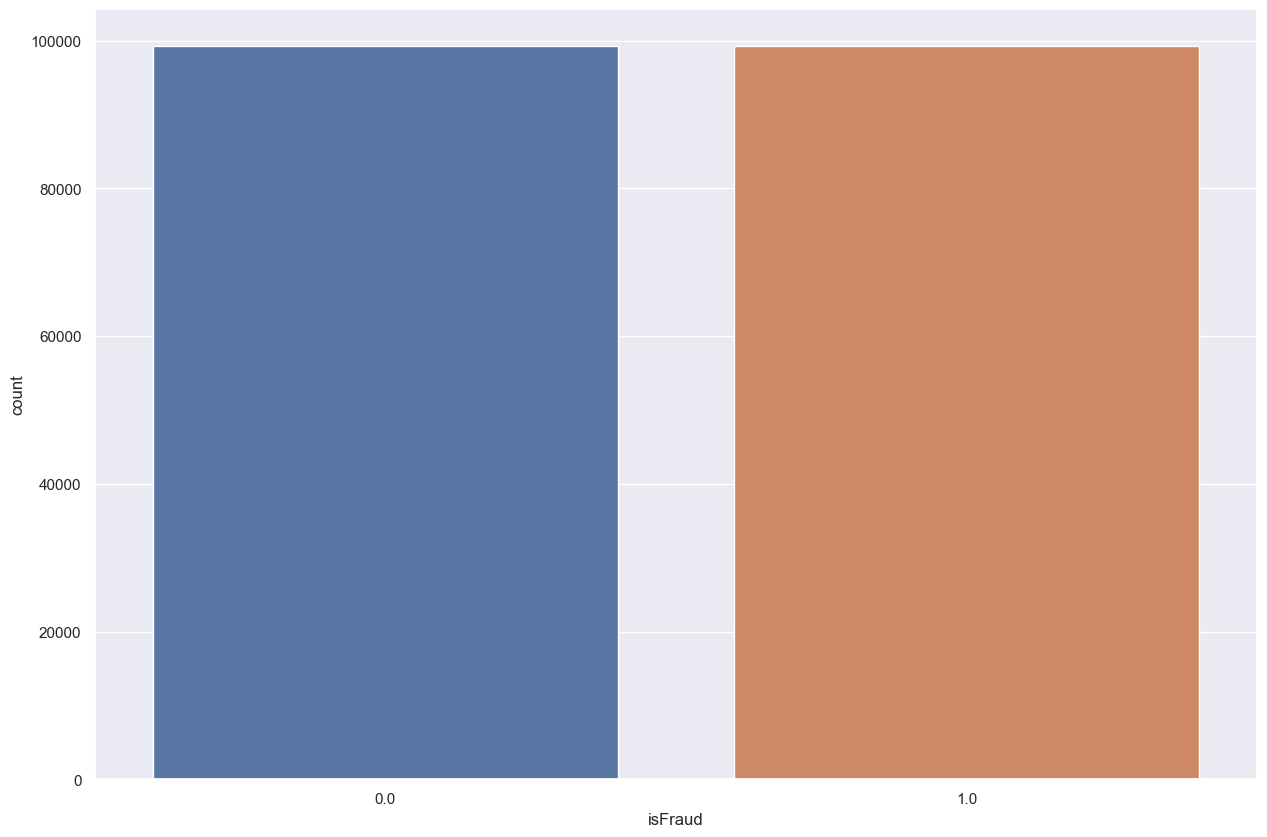

In [107]:
sns.countplot(data=label,x="isFraud")

In [108]:
feat

,0,1,2,3,4,5,6,7,8,9
0,0.019150,0.354870,0.296393,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.003628,0.044321,0.035843,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.000352,0.000378,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.000352,0.000378,0.000000,0.014460,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.022708,0.086673,0.055260,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
198531,1.000000,1.000000,0.000000,0.000000,0.769675,0.0,1.0,0.0,0.0,0.0
198532,0.462267,0.029164,0.306884,0.424504,0.254810,0.0,1.0,0.0,0.0,0.0
198533,0.057238,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
198534,0.750627,0.042077,0.000000,0.480241,0.457088,0.0,1.0,0.0,0.0,0.0


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size = 0.3, random_state = 42)

In [110]:
X_train.shape, y_train.shape

((138975, 10), (138975, 1))

In [111]:
X_test.shape, y_test.shape

((59561, 10), (59561, 1))

### Correlation

In [112]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(AML_Data.corr(), annot = True, cmap = "YlGnBu", vmin=-1, vmax=1)

ValueError: could not convert string to float: 'PAYMENT'

In [113]:
corr=round(AML_Data[[feature for feature in AML_Data.columns]].corr(),2)
corr

ValueError: could not convert string to float: 'PAYMENT'

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

In [115]:
# Define a list of classifiers to test
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    SVC()
]

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define or import classifiers
classifiers = [RandomForestClassifier(), GradientBoostingClassifier(), SVC()]

# Assuming X_train, X_test, y_train, y_test are defined elsewhere

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f" {clf.__class__.__name__} evaluation: ".center(100, "#"))
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print()


################################ RandomForestClassifier evaluation: ################################
Accuracy: 0.949
Confusion Matrix:
[[27620  1994]
 [ 1055 28892]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95     29614
         1.0       0.94      0.96      0.95     29947

    accuracy                           0.95     59561
   macro avg       0.95      0.95      0.95     59561
weighted avg       0.95      0.95      0.95     59561


############################## GradientBoostingClassifier evaluation: ##############################
Accuracy: 0.811
Confusion Matrix:
[[22912  6702]
 [ 4562 25385]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80     29614
         1.0       0.79      0.85      0.82     29947

    accuracy                           0.81     59561
   macro avg       0.81      0.81      0.81     59561
weighted avg       0.8

In [117]:
import pickle
import os
file_path = 'model.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(AML_Data, f)